# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port victoria
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | weno
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | nacozari de garcia
Processing Record 9 of Set 1 | pathein
Processing Record 10 of Set 1 | crucecita
Processing Record 11 of Set 1 | gadzhiyevo
Processing Record 12 of Set 1 | kataragama
City not found. Skipping...
Processing Record 13 of Set 1 | bargara
City not found. Skipping...
Processing Record 14 of Set 1 | huanggang
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | pitkyaranta
Processing Record 17 of Set 1 | kifri
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | olyokminsk
Processing Record 20 of Set 1 | sai buri
Processin

In [8]:
# Convert the city_data list into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the DataFrame
print(city_data_df.head())

                          City      Lat       Lng  Max Temp  Humidity  \
0                port victoria   0.0939   33.9756     21.45        80   
1                     coquimbo -29.9533  -71.3436     15.55        56   
2  edinburgh of the seven seas -37.0676  -12.3116     14.76        91   
3                         weno   7.4515  151.8468     27.83        80   
4       hawaiian paradise park  19.5933 -154.9731     26.73        81   

   Cloudiness  Wind Speed Country        Date  
0          36        3.26      KE  1717279530  
1           0        5.66      CL  1717279156  
2          98        3.82      SH  1717279530  
3         100        5.71      FM  1717279530  
4         100        5.14      US  1717279530  


In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port victoria,0.0939,33.9756,21.45,80,36,3.26,KE,1717279530
1,coquimbo,-29.9533,-71.3436,15.55,56,0,5.66,CL,1717279156
2,edinburgh of the seven seas,-37.0676,-12.3116,14.76,91,98,3.82,SH,1717279530
3,weno,7.4515,151.8468,27.83,80,100,5.71,FM,1717279530
4,hawaiian paradise park,19.5933,-154.9731,26.73,81,100,5.14,US,1717279530


In [12]:
import os

# Create the output_data directory if it doesn't exist
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port victoria,0.0939,33.9756,21.45,80,36,3.26,KE,1717279530
1,coquimbo,-29.9533,-71.3436,15.55,56,0,5.66,CL,1717279156
2,edinburgh of the seven seas,-37.0676,-12.3116,14.76,91,98,3.82,SH,1717279530
3,weno,7.4515,151.8468,27.83,80,100,5.71,FM,1717279530
4,hawaiian paradise park,19.5933,-154.9731,26.73,81,100,5.14,US,1717279530


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

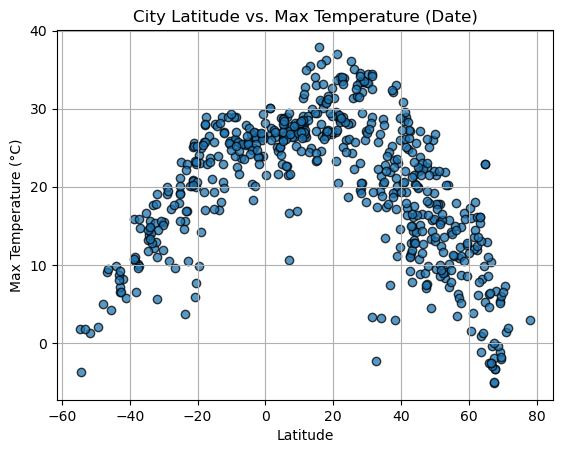

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

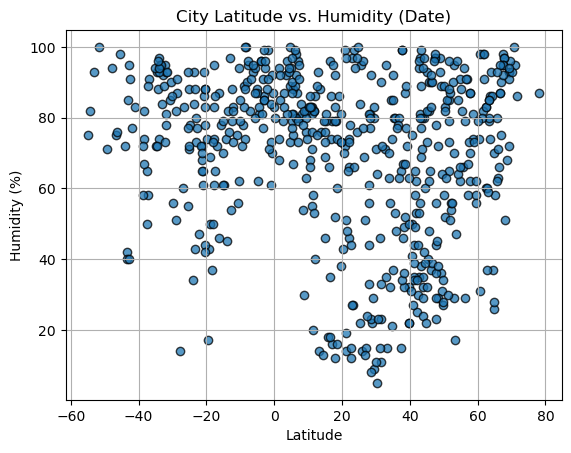

In [15]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

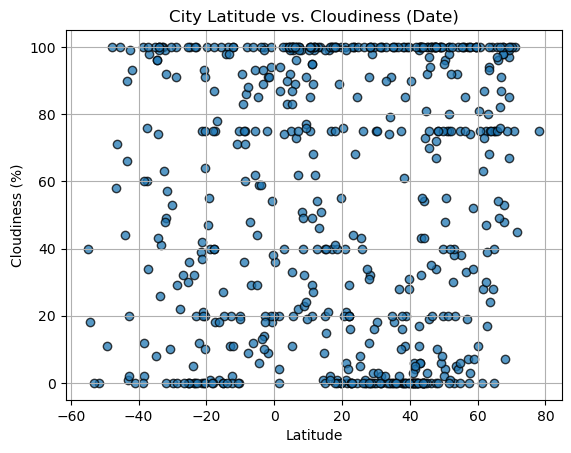

In [16]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

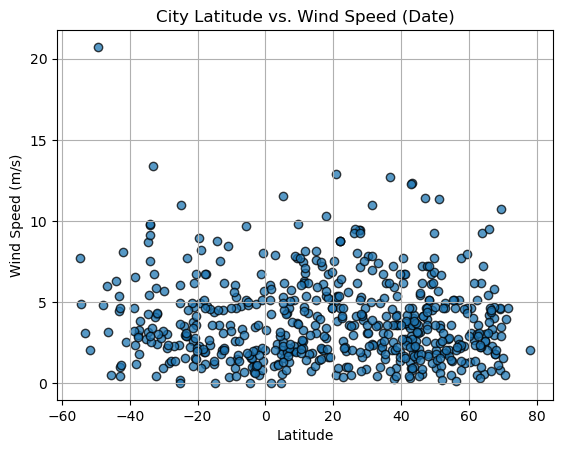

In [17]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# # Import necessary libraries
# import seaborn as sns

# # Create the scatter plot with regression line using Seaborn
# sns.regplot(x=, y=, scatter_kws={"edgecolor": "black", "alpha": 0.75})

# # Add labels and title
# plt.xlabel
# plt.ylabel
# plt.title

# # Show plot
# plt.show()

In [43]:
# Filter the DataFrame to include only Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port victoria,0.0939,33.9756,21.45,80,36,3.26,KE,1717279530
3,weno,7.4515,151.8468,27.83,80,100,5.71,FM,1717279530
4,hawaiian paradise park,19.5933,-154.9731,26.73,81,100,5.14,US,1717279530
6,longyearbyen,78.2186,15.6401,2.91,87,75,2.06,SJ,1717279377
7,nacozari de garcia,30.3742,-109.6908,34.39,5,18,7.83,MX,1717279531


In [44]:
# Filter the DataFrame to include only Northern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coquimbo,-29.9533,-71.3436,15.55,56,0,5.66,CL,1717279156
2,edinburgh of the seven seas,-37.0676,-12.3116,14.76,91,98,3.82,SH,1717279530
5,west island,-12.1568,96.8225,26.99,83,100,6.17,CC,1717279530
9,crucecita,-28.9500,-58.9833,19.01,82,100,3.04,AR,1717279531
15,adamstown,-25.0660,-130.1015,21.15,71,36,6.03,PN,1717279532


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7488201593865043


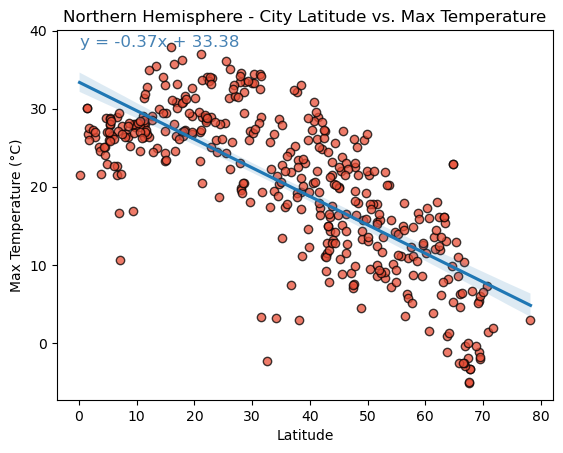

In [116]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=northern_hemi_df["Lat"], y=northern_hemi_df["Max Temp"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#E94F37"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(northern_hemi_df["Lat"].min(), northern_hemi_df["Max Temp"].max()),
             fontsize=12, color='steelblue')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature")

# Calculate the r-value
r_value = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

The r-value is: 0.8488076665823114


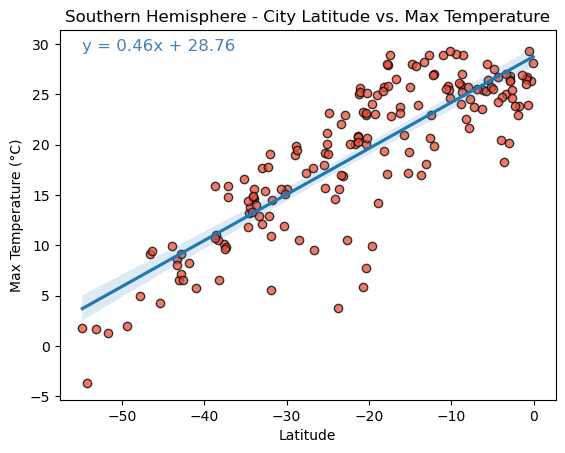

In [115]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=southern_hemi_df["Lat"], y=southern_hemi_df["Max Temp"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#E94F37"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(southern_hemi_df["Lat"].min(), southern_hemi_df["Max Temp"].max()),
             fontsize=12, color='steelblue')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature")

# Calculate the r-value
r_value = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

**Discussion about the linear relationship:** As latitude increases, the maximum temperature tends to decrease. This negative correlation is consistent with the expectation that areas farther from the equator experience cooler temperatures, especially in the Northern Hemisphere where higher latitudes correspond to regions with colder climates.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0077055729159410825


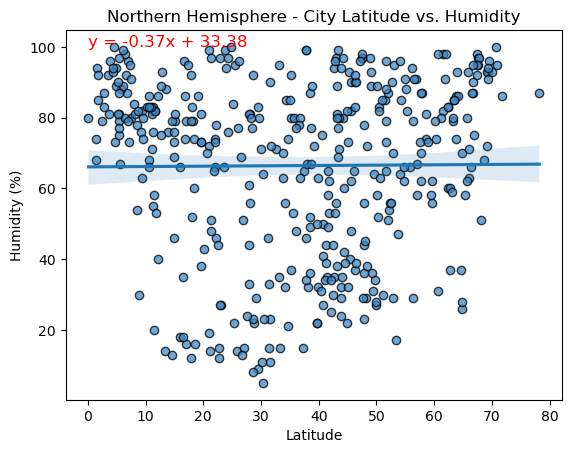

In [120]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=northern_hemi_df["Lat"], y=northern_hemi_df["Humidity"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#3F88C5"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(northern_hemi_df["Lat"].min(), northern_hemi_df["Humidity"].max()),
             fontsize=12, color='red')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity")

# Calculate the r-value
r_value = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

The r-value is: 0.09826398796945832


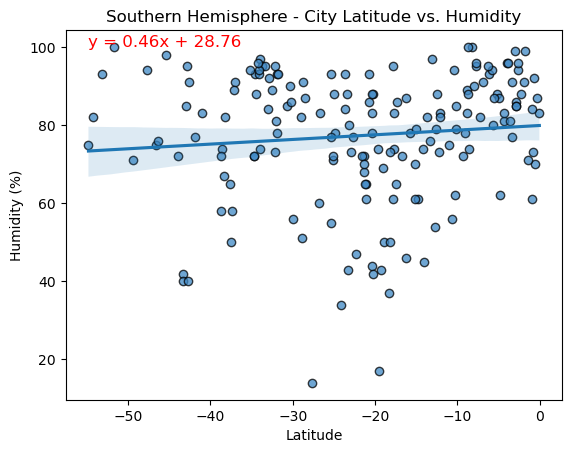

In [121]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=southern_hemi_df["Lat"], y=southern_hemi_df["Humidity"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#3F88C5"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(southern_hemi_df["Lat"].min(), southern_hemi_df["Humidity"].max()),
             fontsize=12, color='red')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity")

# Calculate the r-value
r_value = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

**Discussion about the linear relationship:** This data suggests that latitude alone does not significantly influence humidity levels in the cities of the Northern Hemisphere. There may be other factors that influence humidity moreso than latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013214559095128833


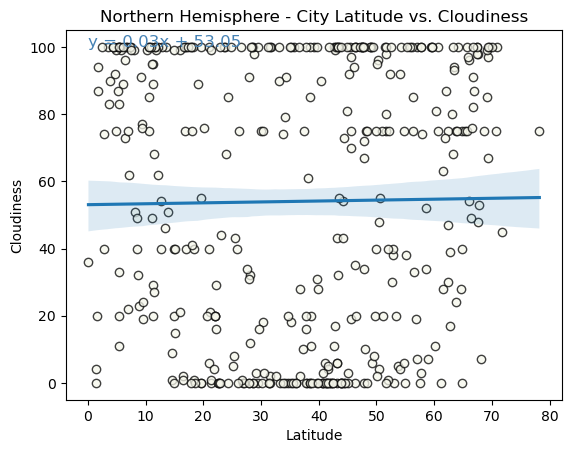

In [110]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=northern_hemi_df["Lat"], y=northern_hemi_df["Cloudiness"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#F6F7EB"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(northern_hemi_df["Lat"].min(), northern_hemi_df["Cloudiness"].max()),
             fontsize=12, color='steelblue')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")

# Calculate the r-value
r_value = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

The r-value is: 0.017442701058433964


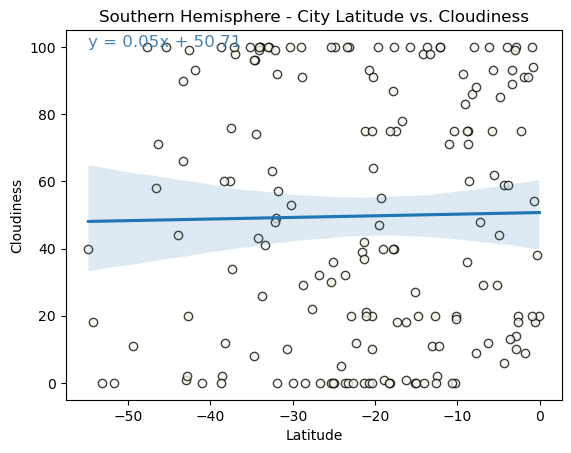

In [109]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=southern_hemi_df["Lat"], y=southern_hemi_df["Cloudiness"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#F6F7EB"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(southern_hemi_df["Lat"].min(), southern_hemi_df["Cloudiness"].max()),
             fontsize=12, color='steelblue')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")

# Calculate the r-value
r_value = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

**Discussion about the linear relationship:** This data suggests that latitude alone does not significantly influence cloudiness levels in the cities of the Northern Hemisphere. There may be other factors that influence humidity moreso than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09751603527779157


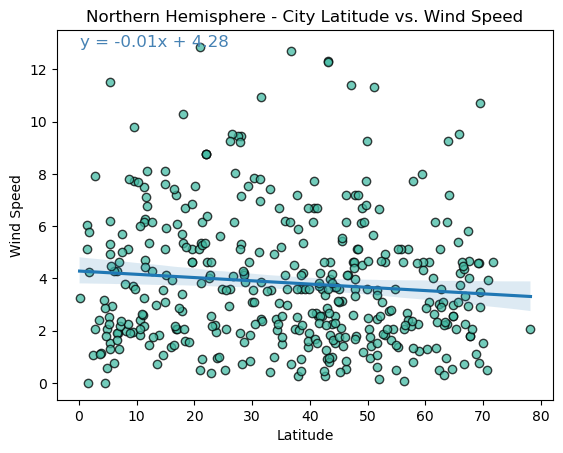

In [108]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=northern_hemi_df["Lat"], y=northern_hemi_df["Wind Speed"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#44BBA4"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(northern_hemi_df["Lat"].min(), northern_hemi_df["Wind Speed"].max()),
             fontsize=12, color='steelblue')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")

# Calculate the r-value
r_value = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

The r-value is: -0.22259092302520017


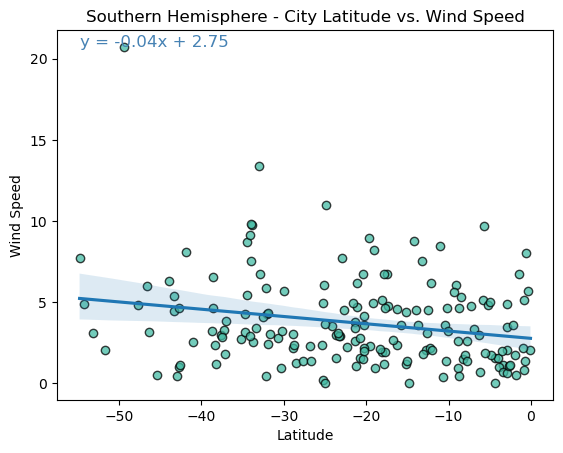

In [107]:
# Create the scatter plot with regression line using Seaborn
sns.regplot(x=southern_hemi_df["Lat"], y=southern_hemi_df["Wind Speed"], scatter_kws={"edgecolor": "black", "alpha": 0.75, "color": "#44BBA4"})

# Get the slope and intercept of the regression line
slope, intercept = np.polyfit(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 1)

# Annotate the regression equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',
             xy=(southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].max()),
             fontsize=12, color='steelblue')

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")

# Calculate the r-value
r_value = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])[0, 1]

# Print the r-value
print("The r-value is:", r_value)

# Show plot
plt.show()

**Discussion about the linear relationship:** These negative r-values imply that, on average, wind speed tends to decrease as you move away from the equator towards the poles in both hemispheres. However, other factors such as local geography, topography, and atmospheric conditions can also influence wind patterns.